# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### <font color="teal">Exercise 09.1
    
In this exercise we want to implement a Genetic Algorithm to solve the Traveling Salesman Problem. 

#### <font color="teal">The Traveling Salesman Problem (TSP)

The traveling salesman problem consists in the challenge of finding the shortest route visiting each member of a collection of given locations and returning to the starting point. 

Considering a set of $N$ cities with positions $\vec{c}_i$ and the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city, the traveling salesman wants to find the path that minimizes the following loss/cost function:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$), that is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

#### <font color="teal">Genetic algorithm (GA)

The TSP problem is a common example for the application of Genetic Algorithms, which are typically used to generate solutions to optimization and search problems. They are based on the theory of natural evolution: they reflect the process of natural selection where the fittest individuals are selected for reproducing the next generation; they rely on biologically inspired operators such as mutation, crossover and selection.

Our Genetic Algorithm is based on the following structure:

**1.** It generates a population of random paths that visit all the cities only once. The paths are expressed as 1D vector whose elements are integers that represents the cities in the order in which the salesman would visit them; they also have as last element their length $L^{(1)}$.
<br>Note: we set the first city to always appear at position 1 in the paths in order to to reduce the degeneration of the shortest path to be 2 (corresponding to walking the shortest route in clockwise and anti-clockwise directions).


**2.** It evaluates the loss/cost function $L^{(1)}$ for each path and sorts them on this basis.
<br>Note: the first/best path is the one that has minimum length.


**3.** It produces the next genereation of the poulation of paths using the following criteria:

- with a selection operator it choses two "parents" paths that will reproduce. The operator uses the order in the orderd population: it selects the individual $j$ with the algorithm: $j=N\times int(r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p=2$.
    
    
- The two "parents" paths are modified into two "sons" paths of the next generation with probability $P_c$, otherwise are copied as they are in the next generation. The change from "parents" to "sons" is ruled by the crossover operator, that:
     1. cut the "parents" paths at the same position;
     2. conserve the first part of the paths;
     3. complete the paths with the missing cities adding them in the order in which they appear in the consort; these are the "sons" paths.


- the two paths (either unmodified "parents" or "sons") undergo to some mutations with probability $P_m$:
    - pair permutation of cities;
    - permutation among some contiguous cities with other contiguous cities;
    - inversion of the order in which they appear in the path of some cities.
    
  Note: the coiche of the cities to permute/invert in order and of the number of those involved is random.

These last steps are repeated until the new population is filled with the same number of paths than the previous one.

After the new generation has been created, the code evaluates $L^{(1)}$ for each path and sorts them, so that the first path of the population is the best/shortest.

New generations are created for as many times as the user decides.

The code we implemented also generates a random configuration of cities in the 2D space. The user can choose the number of cities and the type of the configuration: cities randomly placed on a circumference or inside a square.

The results shown below are computed for:

**1.** 32 cities placed on a circumference; 
<br> **2.** 32 cities placed inside a square.

The parameters used for running the code are the following:

- number of paths in each population: $5000$

- number of generations of populations: $300$

- crossover probability: $P_c=60\%$

- mutation probability: $P_m=5\%$

In order to show the behaviour of the optimization process, beyond the best path obtained, we picture the length of the best path $L^{(1)}$ and $\langle L^{(1)}\rangle$, averaged on the best half of the population, as a function of the generations of the algorithm.

#### 1. Cities on a circumference

In [1]:
import matplotlib.pyplot as plt
import numpy as np

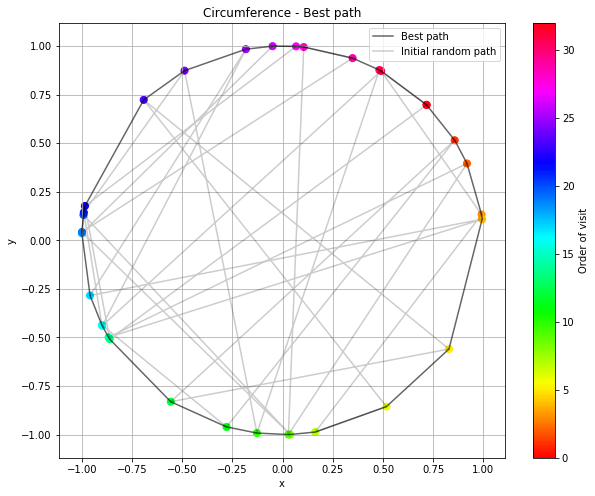

In [2]:
x, y = np.loadtxt("circle/best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("circle/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

fig= plt.figure(figsize=(10,8))
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circumference - Best path')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.show()

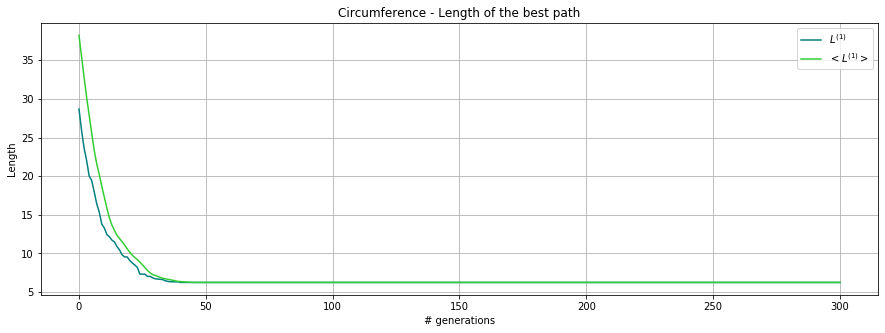

After 300 generations, the length of the best path is: 6.2403


In [3]:
x, y, z = np.loadtxt("circle/best_length.out", usecols=(0,1,2), unpack=True)

fig= plt.figure(figsize=(15,5))
plt.plot(x,y, color='teal', label="$L^{(1)}$")
plt.plot(x,z, color='limegreen', label="$<L^{(1)}>$")
plt.xlabel('# generations')
plt.ylabel('Length')
plt.title('Circumference - Length of the best path')
plt.grid(True)
plt.legend()
plt.show()

gen, best = np.loadtxt("circle/best_length.out", usecols=(0,1), skiprows=300, unpack=True)
print("After", int(gen), "generations, the length of the best path is:", best)

#### 2. Cities inside a square

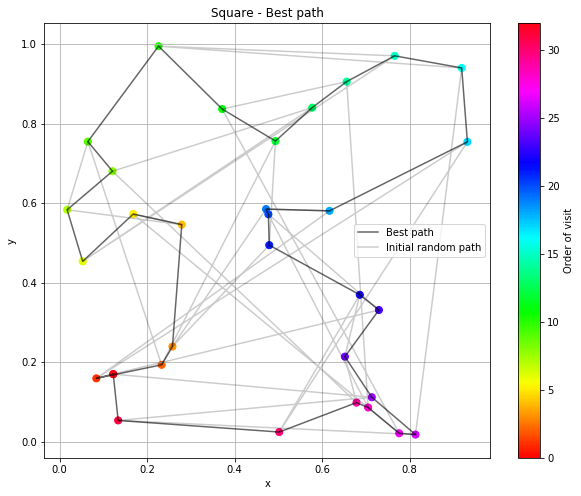

In [4]:
x, y = np.loadtxt("square/best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("square/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

fig= plt.figure(figsize=(10,8))
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Square - Best path')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.show()

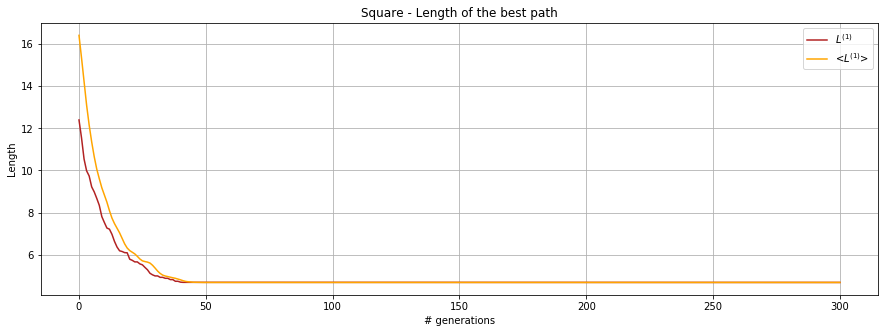

After 300 generations, the length of the best path is: 4.67677


In [5]:
x, y, z = np.loadtxt("square/best_length.out", usecols=(0,1,2), unpack=True)

fig= plt.figure(figsize=(15,5))
plt.plot(x,y, color='firebrick', label="$L^{(1)}$")
plt.plot(x,z, color='orange', label="<$L^{(1)}$>")
plt.xlabel('# generations')
plt.ylabel('Length')
plt.title('Square - Length of the best path')
plt.grid(True)
plt.legend()
plt.show()

gen, best = np.loadtxt("square/best_length.out", usecols=(0,1), skiprows=300, unpack=True)
print("After", int(gen), "generations, the length of the best path is:", best)

As we can see from the pictures, the Genetic Algorithm converges: both for the circumference and the square configurations $L^{(1)}$ stabilizes on a value that we reasonably assume is the shortest lenght for a path that visits the cities, and so the solution of the Traveling Salesman Problem.

$L^{(1)}$ seems to reach its minimum value already after $\sim 50$ generations, but we prefer to keep the code running for more generations to be sure it does not settle down in a local minimum.

**Note**: as we can compare this algorithm to solve the TSP with the others implemented in the next exercise (10), it is preferred to maintain the shown cities configurations for all of them. However, it is possible to start the code with different random configurations. The results are always reasonable with any configuration, as one can see in the example picture below.

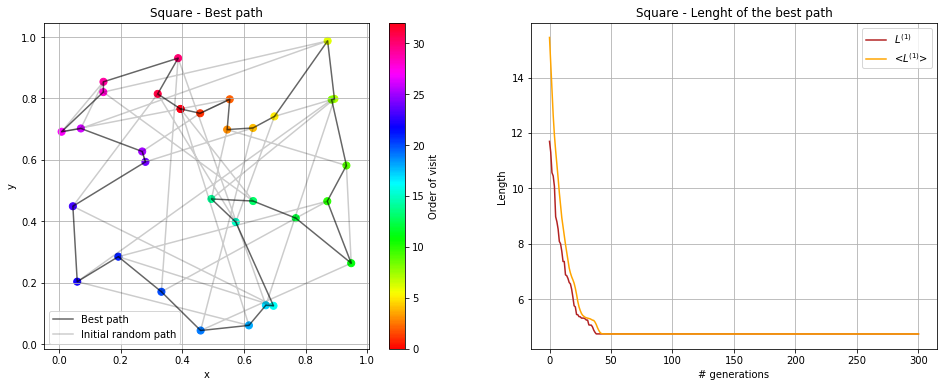

After 300 generations, the length of the best path is: 4.73997


In [6]:
x, y = np.loadtxt("square2/best_path.out", usecols=(0,1), unpack=True)
xi, yi = np.loadtxt("square2/positions.out", usecols=(0,1), unpack=True)
ncities=len(x)

x2, y2, z2 = np.loadtxt("square2/best_length.out", usecols=(0,1,2), unpack=True)

fig= plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x,y, color='black', alpha=0.6, label="Best path")
plt.plot(xi,yi, color='black', alpha=0.2, label="Initial random path")
plt.scatter(x,y, s=50, c=np.arange(ncities), cmap='hsv')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Square - Best path')
plt.grid(True)
plt.legend()
plt.colorbar().set_label('Order of visit')

plt.subplot(122)
plt.plot(x2,y2, color='firebrick', label="$L^{(1)}$")
plt.plot(x2,z2, color='orange', label="<$L^{(1)}$>")
plt.xlabel('# generations')
plt.ylabel('Length')
plt.title('Square - Lenght of the best path')
plt.grid(True)
plt.legend()

plt.show()

gen, best = np.loadtxt("square2/best_length.out", usecols=(0,1), skiprows=300, unpack=True)
print("After", int(gen), "generations, the length of the best path is:", best)